# Imports

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# How has Russian equipment  and Personnel losses changed over time?

In [37]:
russian_equip = pd.read_csv('russia_losses_equipment.csv')
russian_pers = pd.read_csv('russia_losses_personnel.csv')
russian_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       655 non-null    object 
 1   day                        655 non-null    int64  
 2   aircraft                   655 non-null    int64  
 3   helicopter                 655 non-null    int64  
 4   tank                       655 non-null    int64  
 5   APC                        655 non-null    int64  
 6   field artillery            655 non-null    int64  
 7   MRL                        655 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      655 non-null    int64  
 11  naval ship                 655 non-null    int64  
 12  anti-aircraft warfare      655 non-null    int64  
 13  special equipment          636 non-null    float64

In [44]:
equip_df = russian_equip.fillna(0)
equip_df.drop(columns=['greatest losses direction', 'day'],inplace = True)

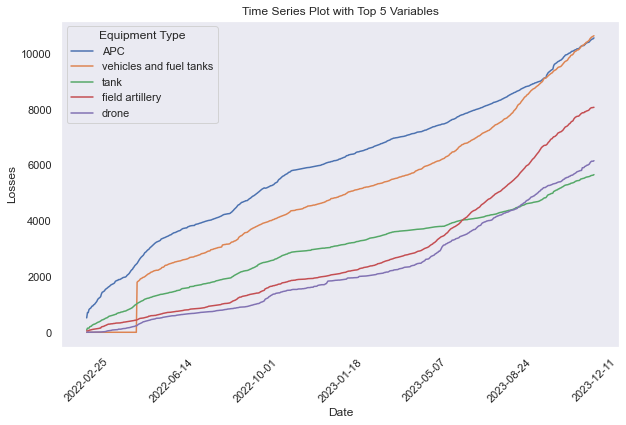

In [63]:
# Calculate the sum of values for each column
sum_values = equip_df.iloc[:, 1:].sum(axis=0)

# Select the top 5 columns with the highest sum values
top_columns = sum_values.nlargest(5).index.tolist()

# Subset the DataFrame to include only the top 5 columns
df_top5 = equip_df[['date'] + top_columns]

# Melt the DataFrame to long format for Seaborn
df_long = pd.melt(df_top5, id_vars=['date'], var_name='Variable', value_name='Value')

# Create a time series plot using Seaborn
sns.set_style("dark")
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='Value', hue='Variable', data=df_long)

# Optionally, you can add labels and a legend
plt.title('Time Series Plot with Top 5 Variables')
plt.xlabel('Date')
plt.ylabel('Losses')
plt.legend(title='Equipment Type')

xtick_positions = [df_top5['date'].iloc[i] for i in range(0, len(df_top5['date']), len(df_top5['date']) // 6)]
plt.xticks(xtick_positions, rotation=45)  # Adjust rotation as needed

plt.show()